In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import glob
import os

#import statannotations
from statannot import add_stat_annotation

In [77]:
home = '/Users/kathleenkanaley/Desktop/grapes_in_space/'

In [78]:
# Open dfs with no masked pixels

ss_nm_2020 = pd.read_csv(home +'stats_work/SkySat_2020/analysis_ready/skysat_2020_nomask.csv')
ss_nm_2021 = pd.read_csv(home +'stats_work/SkySat_2021/analysis_ready/skysat_2021_nomask.csv')
ss_nm_2022 = pd.read_csv(home +'stats_work/SkySat_2022/analysis_ready/skysat_2022_nomask.csv')

skysat_nm = pd.concat([ss_nm_2020, ss_nm_2021, ss_nm_2022])
skysat_nm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2251 entries, 0 to 719
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acquired     2251 non-null   int64  
 1   plot         2251 non-null   int64  
 2   blue         2251 non-null   float64
 3   green        2251 non-null   float64
 4   red          2251 non-null   float64
 5   nir          2251 non-null   float64
 6   row          2251 non-null   int64  
 7   panel        2251 non-null   int64  
 8   Date         2251 non-null   object 
 9   Treatment    2251 non-null   float64
 10  Block        2251 non-null   object 
 11  PM_severity  2251 non-null   float64
 12  DM_severity  2251 non-null   float64
 13  total_dis    2251 non-null   float64
 14  geometry     2251 non-null   object 
 15  centroid     2251 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 299.0+ KB


In [79]:
skysat_nm_dup = skysat_nm[skysat_nm.duplicated()]
skysat_nm_dup.shape, skysat_nm.shape

((37, 16), (2251, 16))

In [80]:
# Drop duplicates
skysat_nm = skysat_nm.drop_duplicates()
skysat_nm.shape

(2214, 16)

In [81]:
skysat_nm.row.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [82]:
ss_nm_2020.row.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [83]:
skysat_nm['ndvi']= (skysat_nm['nir']-skysat_nm['red'])/(skysat_nm['nir']+skysat_nm['red'])
skysat_nm['evi']= 2.5*(skysat_nm['nir']-skysat_nm['red'])/(skysat_nm['nir']+6*skysat_nm['red']-7.5*skysat_nm['blue']+1)
skysat_nm['savi']= 1.5*(skysat_nm['nir']-skysat_nm['red'])/(skysat_nm['nir']+skysat_nm['red']+0.5)
skysat_nm['sr']= skysat_nm['nir']/skysat_nm['red']
skysat_nm['msr']= ((skysat_nm['nir']/skysat_nm['red'])-1)/(np.sqrt((skysat_nm['nir']/skysat_nm['red'])+1))
#skysat_m['dvi']= skysat_m['nir']-skysat_m['red']
#skysat_m['nirv']= skysat_m['ndvi']*skysat_m['nir']
skysat_nm['gcc']=skysat_nm['green']/(skysat_nm['green']+skysat_nm['red']+skysat_nm['blue'])
#skysat_m['tvi']=0.5*(120*(skysat_m['nir']-skysat_m['green'])-200*(skysat_m['red']-skysat_m['green']))
skysat_nm['arvi']=(skysat_nm['nir']-(2*skysat_nm['red']-skysat_nm['blue']))/(skysat_nm['nir']+(2*skysat_nm['red']-skysat_nm['blue']))

skysat_nm.head()

,acquired,plot,blue,green,red,nir,row,panel,Date,Treatment,...,total_dis,geometry,centroid,ndvi,evi,savi,sr,msr,gcc,arvi
0,20200625,2,0.055840,0.074537,0.063650,0.284137,1,2,2020-06-25,9.0,...,0.15,POLYGON ((-77.01535545427274 42.87831851925121...,POINT (-77.0153965503027 42.87833067861654),0.633971,0.441950,0.390110,4.464048,1.481926,0.384157,0.598084
1,20200625,3,0.051873,0.070787,0.058603,0.277567,1,3,2020-06-25,22.0,...,0.10,POLYGON ((-77.01544069426711 42.87833411925217...,POINT (-77.01548247530272 42.87834674861851),0.651347,0.441410,0.392797,4.736363,1.560022,0.390518,0.618937
2,20200625,4,0.052025,0.073668,0.061257,0.285911,1,4,2020-06-25,18.0,...,0.40,POLYGON ((-77.01552730426143 42.87835065925314...,POINT (-77.01557007030289 42.87836309362055),0.647104,0.444589,0.397773,4.667386,1.540512,0.394051,0.604437
3,20200625,5,0.047086,0.067566,0.049576,0.312017,1,5,2020-06-25,6.0,...,0.35,POLYGON ((-77.01561588425558 42.87836680925413...,POINT (-77.01565649030296 42.878378758622546),0.725792,0.522240,0.456900,6.293733,1.960140,0.411414,0.713991
4,20200625,6,0.051490,0.073420,0.058720,0.301683,1,6,2020-06-25,2.0,...,0.00,"POLYGON ((-77.01570014425 42.878381989255075, ...",POINT (-77.01574402030295 42.87839504362453),0.674143,0.479094,0.423575,5.137659,1.670142,0.399826,0.641219


In [84]:
# Add disease class column
skysat_nm['disease_class'] = 'low'
skysat_nm.loc[skysat_nm['DM_severity'] > 10, 'disease_class'] = 'high'

In [85]:
# Get just 2021
ss_2021_dates = ss_nm_2021.Date.unique()
df_2021 = skysat_nm[skysat_nm['Date'].isin(ss_2021_dates)]
df_2021.shape

(1195, 24)

In [86]:
dm_trial = df_2021[df_2021['row']<=5]

In [87]:
#Check for duplicates

dup_rows = dm_trial[dm_trial.duplicated(['Date', 'row', 'panel'])]
dup_rows.shape, dm_trial.shape


((0, 24), (400, 24))

In [88]:
# Plot disease progress for utc and comm. standard

data = pd.read_csv('scout_2021_gdf.csv')
dm_data = data[data['Block']=='DM']
dm_data.Treatment.unique()

array([ 5.,  7.,  9., 15.,  3., 11.,  8.,  4., 13., 14.,  6., 16.,  2.,
       10., 12., 20., 18.,  1., 17., 19.])

In [89]:
dm_data.DM_severity.max()

81.125

In [90]:
dm_data[dm_data['Date']=='2021-08-17']['DM_severity'].min()

0.1

In [91]:
last_day = dm_data[dm_data['Date']=='2021-08-17']
last_day[last_day['DM_severity']==0.1]

,Date,Row,Panel,Treatment,Block,PM_severity,DM_severity,total_dis,geometry,centroid
1747,2021-08-17,5,4,11.0,DM,2.25,0.1,2.35,POLYGON ((-77.01553102784763 42.87844998993179...,POINT (-77.01557395530281 42.878462798620625)


In [92]:
dm_data[dm_data['DM_severity']==81.125]

,Date,Row,Panel,Treatment,Block,PM_severity,DM_severity,total_dis,geometry,centroid
1272,2021-08-03,5,9,20.0,DM,0.0,81.125,81.125,POLYGON ((-77.01596637781898 42.87853151993666...,POINT (-77.01600935030324 42.87854432363066)


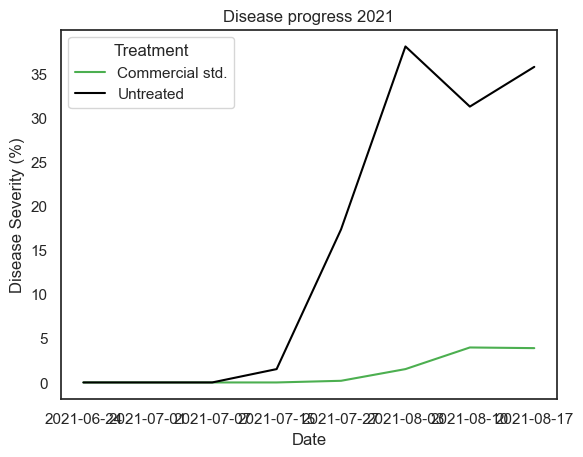

In [95]:
# Plot disease progress for utc and comm. standard

treats = [11,20]
colors = ["#4CAF50", "#FFFFFF"]
sns.set_theme(style='white')
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=dm_data[dm_data['Treatment'].isin(treats)], x='Date', y= 'DM_severity', hue='Treatment',palette=["#4CAF50", "#000000"], errorbar=None)

plt.xticks
plt.ylabel('Disease Severity (%)')
plt.legend(title='Treatment', loc='upper left', labels=['Commercial std.', 'Untreated'])
plt.title('Disease progress 2021')
plt.savefig(home+'figs/dis_prog.svg', bbox_inches='tight')

In [96]:
dm_data.Date.unique()

array(['2021-06-24', '2021-07-01', '2021-07-07', '2021-07-15',
       '2021-07-27', '2021-08-03', '2021-08-10', '2021-08-17'],
      dtype=object)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2021-08-03_low v.s. 2021-08-03_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.044e-02 U_stat=9.780e+02
2021-07-27_low v.s. 2021-07-27_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.440e+02
2021-08-10_low v.s. 2021-08-10_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.380e-04 U_stat=1.199e+03
2021-08-17_low v.s. 2021-08-17_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.586e-01 U_stat=9.680e+02


Text(0.5, 1.0, 'ARVI 2021, DM Trial, Unmasked')

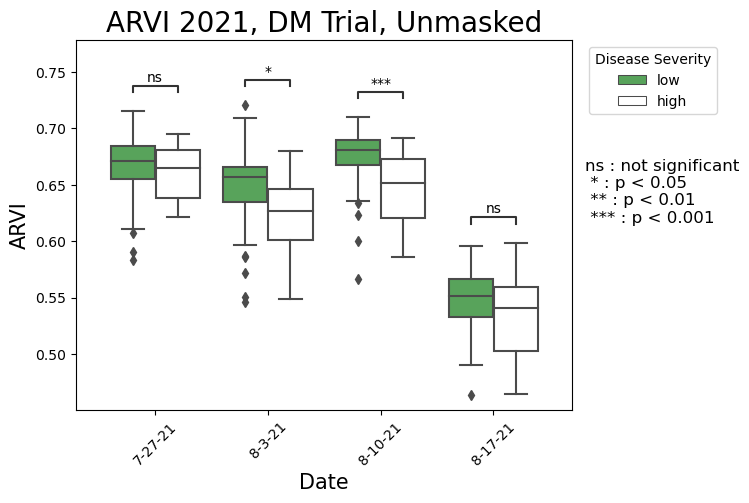

In [13]:
x = "Date"
y = "arvi"
hue = "disease_class"
hue_order=['low', 'high']
order = dm_trial['Date'].unique()[1:]
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=dm_trial, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['7-27-21','8-3-21','8-10-21','8-17-21'], 
                   rotation=45)
add_stat_annotation(ax, data=dm_trial, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=15)
plt.ylabel("ARVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("ARVI 2021, DM Trial, Unmasked", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2021-08-03_low v.s. 2021-08-03_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.647e-03 U_stat=9.870e+02
2021-07-27_low v.s. 2021-07-27_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.790e-01 U_stat=6.210e+02
2021-08-10_low v.s. 2021-08-10_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.007e-03 U_stat=1.171e+03
2021-08-17_low v.s. 2021-08-17_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.655e-02 U_stat=1.089e+03


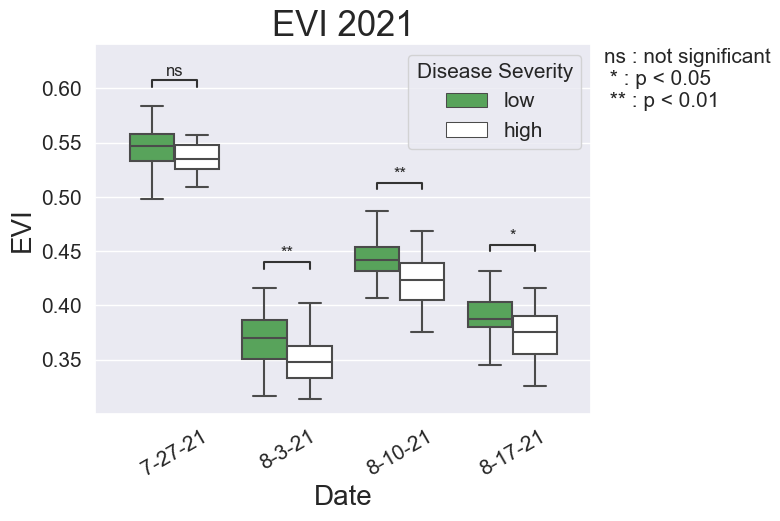

In [53]:
x = "Date"
y = "evi"
hue = "disease_class"
hue_order=['low', 'high']
order = dm_trial['Date'].unique()[1:]
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=dm_trial, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['7-27-21','8-3-21','8-10-21','8-17-21'], fontsize=15, 
                   rotation=30)

add_stat_annotation(ax, data=dm_trial, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)

plt.yticks(fontsize=15)
plt.xlabel("Date", fontsize=20)
plt.ylabel("EVI", fontsize= 20)
plt.legend(title='Disease Severity', title_fontsize=15,fontsize=15, loc='upper right', bbox_to_anchor=(1.0, 1) )
plt.figtext(0.92, 0.75, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01', fontsize=15)
plt.title("EVI 2021", fontsize=25)

plt.savefig('savi_boxplt.svg', bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2021-08-03_low v.s. 2021-08-03_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.081e-02 U_stat=9.770e+02
2021-07-27_low v.s. 2021-07-27_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.234e-01 U_stat=6.330e+02
2021-08-10_low v.s. 2021-08-10_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.821e-03 U_stat=1.155e+03
2021-08-17_low v.s. 2021-08-17_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.268e-02 U_stat=1.066e+03


Text(0.5, 1.0, 'SAVI 2021, DM Trial, Unmasked')

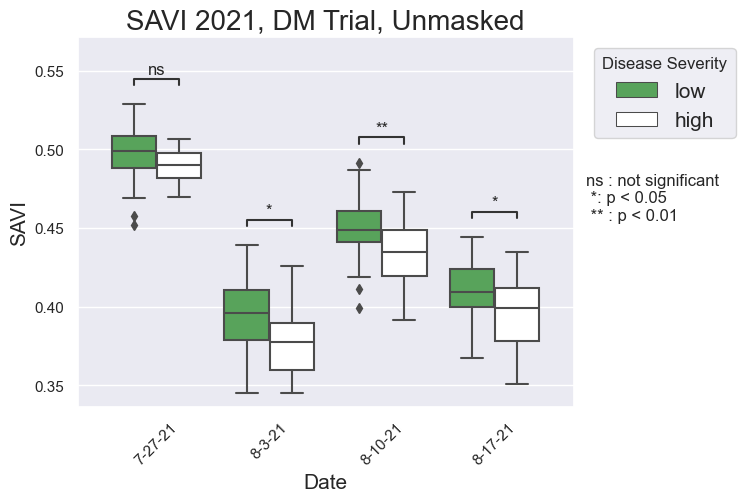

In [128]:
x = "Date"
y = "savi"
hue = "disease_class"
hue_order=['low', 'high']
order = dm_trial['Date'].unique()[1:]
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=dm_trial, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['7-27-21','8-3-21','8-10-21','8-17-21'], 
                   rotation=45)
add_stat_annotation(ax, data=dm_trial, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=15)
plt.ylabel("SAVI", fontsize= 15)
plt.legend(title='Disease Severity',fontsize=15, loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n *: p < 0.05\n ** : p < 0.01', fontsize=12)
plt.title("SAVI 2021, DM Trial, Unmasked", fontsize=20)

#plt.savefig('savi_boxplt.png', bbox_inches='tight')

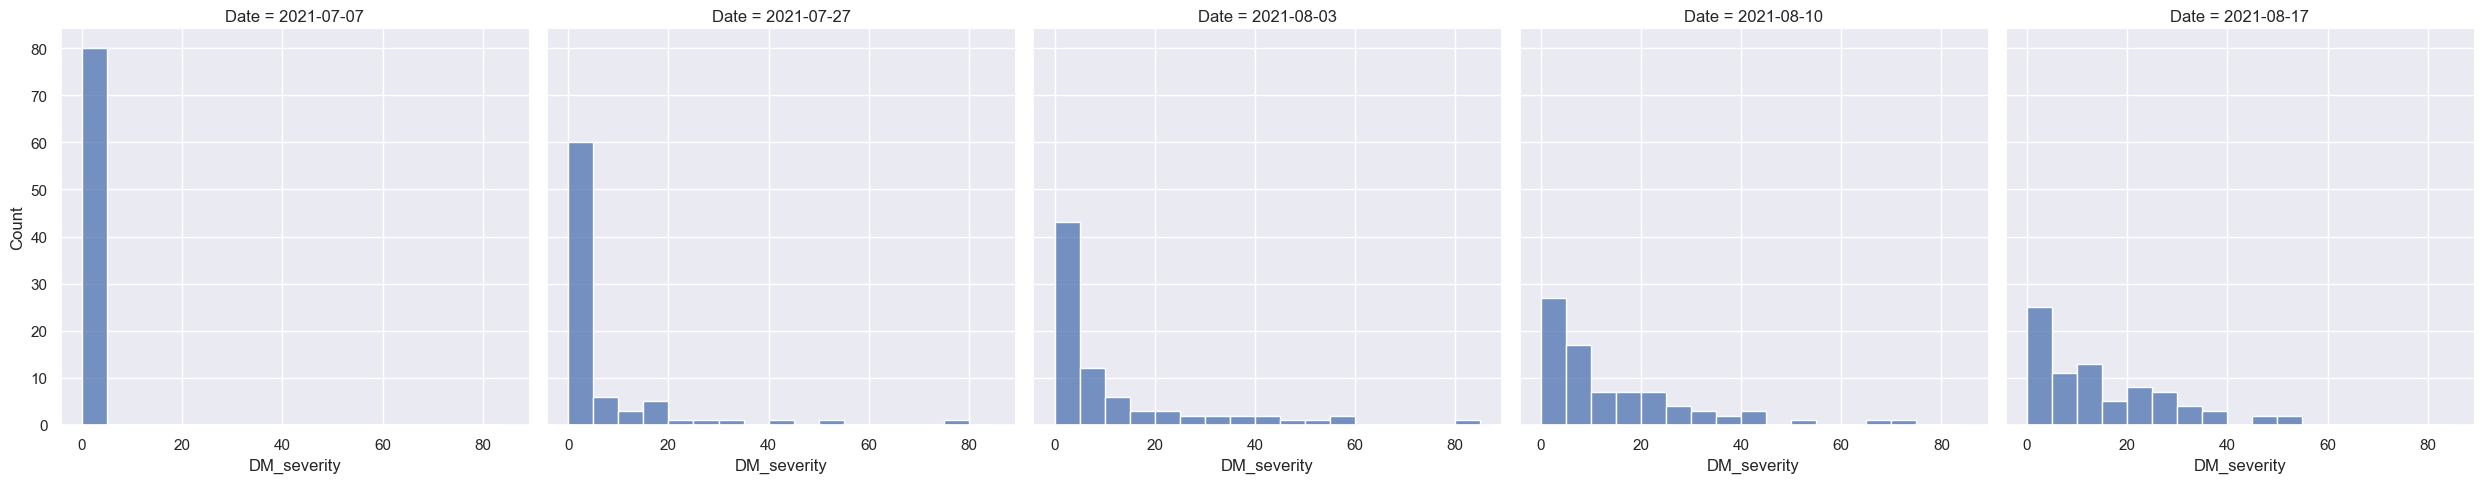

In [132]:
sns.set_theme(style="darkgrid")

sns.displot(
    dm_trial, x="DM_severity", col="Date",
    binwidth=5, height=5) #facet_kws=dict(margin_titles=True),

plt.show()

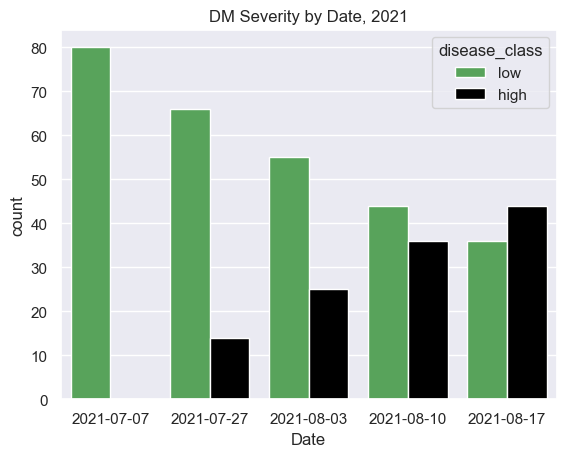

In [52]:
sns.set_theme(style="darkgrid")
colors = ["#4CAF50", "#000000"]
sns.set_palette(sns.color_palette(colors))

sns.countplot(data=dm_trial, x="Date", hue="disease_class")
plt.title('DM Severity by Date, 2021')

plt.savefig(home+'figs/sevbydate_dmtrial.png')

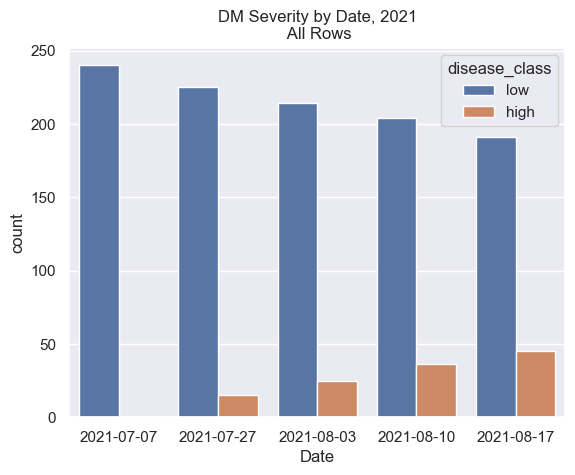

In [134]:
sns.countplot(data=df_2021, x="Date", hue="disease_class")
plt.title('DM Severity by Date, 2021\n All Rows')

plt.savefig(home+'figs/sevbydate.png')

In [136]:
# Repeat with data from MASKED rasters
# Open gdfs

ss_2020 = pd.read_csv(home +'stats_work/SkySat_2020/analysis_ready/skysat_2020_gdf.csv')
ss_2021 = pd.read_csv(home +'stats_work/SkySat_2021/analysis_ready/skysat_2021_gdf.csv')
ss_2022 = pd.read_csv(home +'stats_work/SkySat_2022/analysis_ready/skysat_2022_gdf.csv')

skysat_m = pd.concat([ss_2020, ss_2021, ss_2022])
skysat_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1555 entries, 0 to 237
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acquired     1555 non-null   int64  
 1   plot         1555 non-null   int64  
 2   blue         1555 non-null   float64
 3   green        1555 non-null   float64
 4   red          1555 non-null   float64
 5   nir          1555 non-null   float64
 6   row          1555 non-null   int64  
 7   panel        1555 non-null   int64  
 8   Date         1555 non-null   object 
 9   Treatment    1555 non-null   float64
 10  Block        1555 non-null   object 
 11  PM_severity  1555 non-null   float64
 12  DM_severity  1555 non-null   float64
 13  total_dis    1555 non-null   float64
 14  geometry     1555 non-null   object 
 15  centroid     1555 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 206.5+ KB


In [137]:
# Check for duplicates
dup_rows_mask = skysat_m[skysat_m.duplicated()]
dup_rows_mask.shape, skysat_m.shape

((30, 16), (1555, 16))

In [138]:
skysat_m = skysat_m.drop_duplicates()
skysat_m.shape

(1525, 16)

In [139]:
# SkySat: Add columns for VIS

skysat_m['ndvi']= (skysat_m['nir']-skysat_m['red'])/(skysat_m['nir']+skysat_m['red'])
skysat_m['evi']= 2.5*(skysat_m['nir']-skysat_m['red'])/(skysat_m['nir']+6*skysat_m['red']-7.5*skysat_m['blue']+1)
skysat_m['savi']= 1.5*(skysat_m['nir']-skysat_m['red'])/(skysat_m['nir']+skysat_m['red']+0.5)
skysat_m['sr']= skysat_m['nir']/skysat_m['red']
skysat_m['msr']= ((skysat_m['nir']/skysat_m['red'])-1)/(np.sqrt((skysat_m['nir']/skysat_m['red'])+1))
#skysat_m['dvi']= skysat_m['nir']-skysat_m['red']
#skysat_m['nirv']= skysat_m['ndvi']*skysat_m['nir']
skysat_m['gcc']=skysat_m['green']/(skysat_m['green']+skysat_m['red']+skysat_m['blue'])
#skysat_m['tvi']=0.5*(120*(skysat_m['nir']-skysat_m['green'])-200*(skysat_m['red']-skysat_m['green']))
skysat_m['arvi']=(skysat_m['nir']-(2*skysat_m['red']-skysat_m['blue']))/(skysat_m['nir']+(2*skysat_m['red']-skysat_m['blue']))

skysat_m.head()

,acquired,plot,blue,green,red,nir,row,panel,Date,Treatment,...,total_dis,geometry,centroid,ndvi,evi,savi,sr,msr,gcc,arvi
0,20200625,5,0.047086,0.067566,0.049576,0.312017,1,5,25-Jun,6.0,...,0.35,POLYGON ((-77.01561588425558 42.87836680925413...,POINT (-77.01565649030296 42.878378758622546),0.725792,0.522240,0.456900,6.293733,1.960140,0.411414,0.713991
1,20200625,6,0.051490,0.073420,0.058720,0.301683,1,6,25-Jun,2.0,...,0.00,"POLYGON ((-77.01570014425 42.878381989255075, ...",POINT (-77.01574402030295 42.87839504362453),0.674143,0.479094,0.423575,5.137659,1.670142,0.399826,0.641219
2,20200625,6,0.051490,0.073420,0.058720,0.301683,1,6,25-Jun,2.0,...,0.15,"POLYGON ((-77.01570014425 42.878381989255075, ...",POINT (-77.01574402030295 42.87839504362453),0.674143,0.479094,0.423575,5.137659,1.670142,0.399826,0.641219
3,20200625,7,0.050674,0.070437,0.052152,0.313204,1,7,25-Jun,15.0,...,0.10,POLYGON ((-77.01579094424405 42.87839937925609...,POINT (-77.01583096030309 42.87841144862656),0.714515,0.523755,0.452505,6.005610,1.891185,0.406533,0.707608
4,20200625,8,0.049583,0.067687,0.049273,0.332067,1,8,25-Jun,11.0,...,0.00,POLYGON ((-77.01587402423856 42.87841479925702...,POINT (-77.01591583530309 42.8784276436285),0.741578,0.562960,0.481301,6.739278,2.063037,0.406421,0.742995


In [5]:
# Visualize correlations between wavelengths, VIs, and disease

# first filter the df to just these columns

skysat_m.columns.unique()


Index(['acquired', 'plot', 'blue', 'green', 'red', 'nir', 'row', 'panel',
       'Date', 'Treatment', 'Block', 'PM_severity', 'DM_severity', 'total_dis',
       'geometry', 'centroid', 'ndvi', 'evi', 'savi', 'sr', 'msr', 'gcc',
       'arvi'],
      dtype='object')

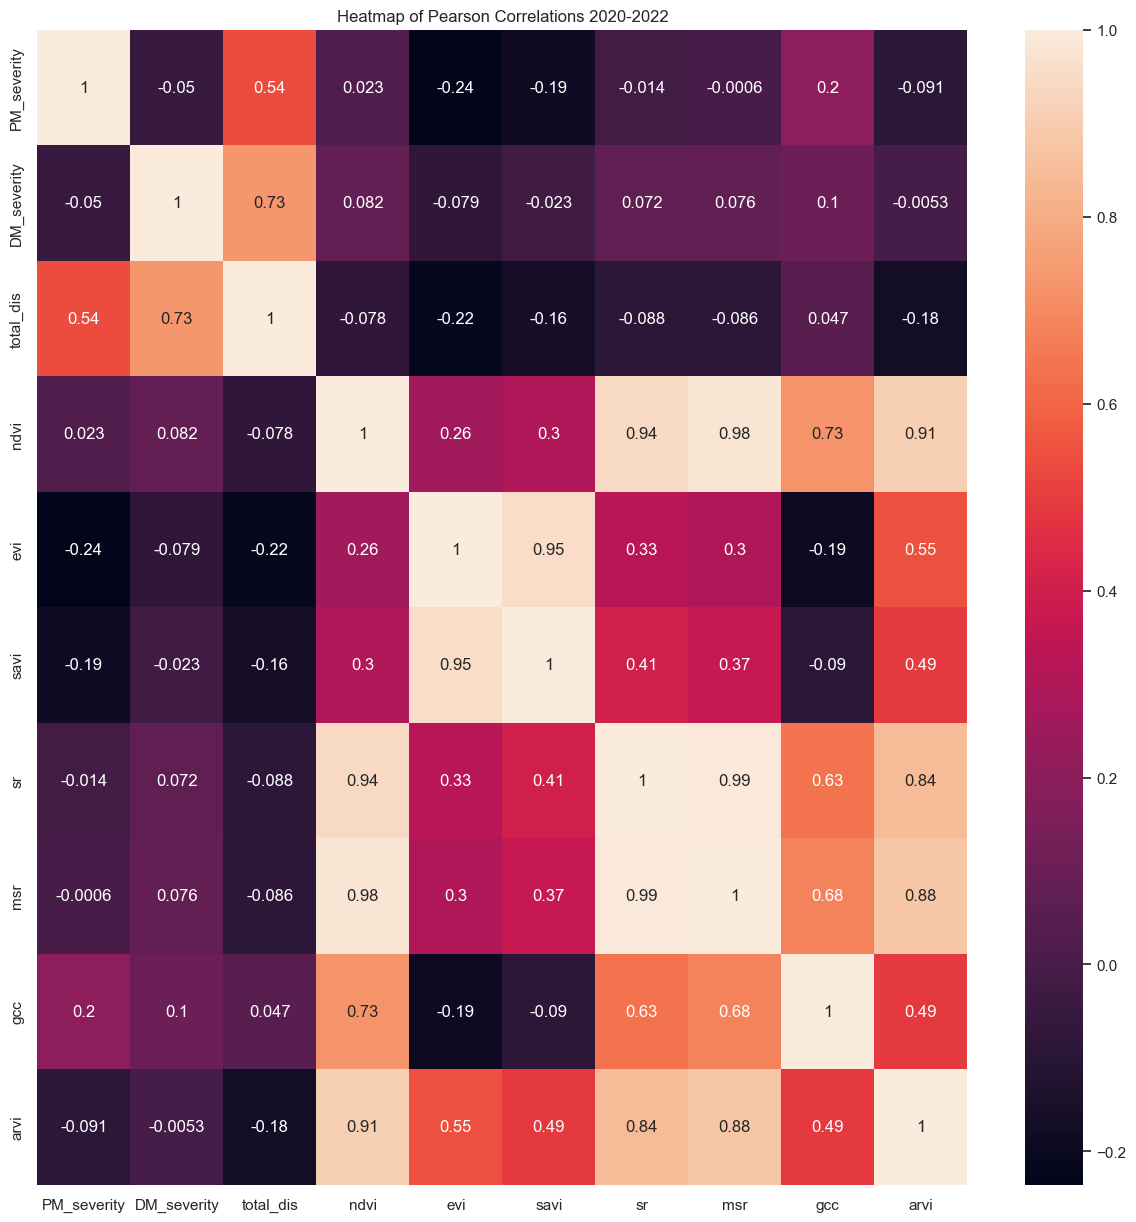

In [183]:
cols = ['PM_severity','DM_severity', 'total_dis', 'ndvi', 'evi', 'savi', 'sr', 'msr', 'gcc', 'arvi']
filtered = skysat_m[cols]
correlations = filtered.corr()

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlations, annot=True).set(title='Heatmap of Pearson Correlations 2020-2022');
plt.show()

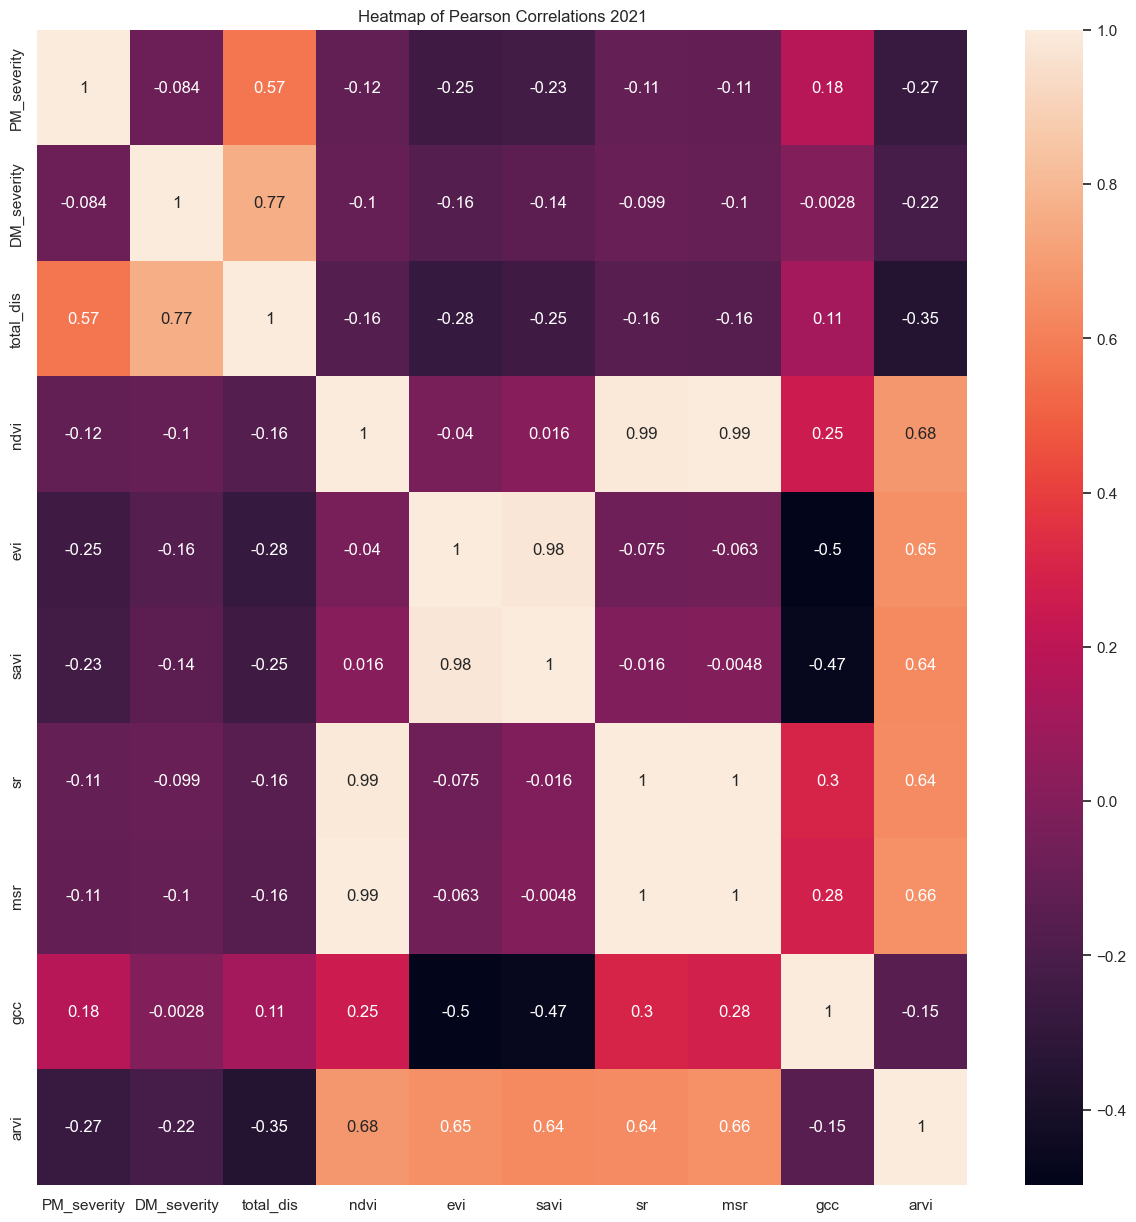

In [175]:
ss_2021_dates = ss_2021.Date.unique()
df_2021_m = skysat_m[skysat_m['Date'].isin(ss_2021_dates)]
filtered_2021 = df_2021_m[cols]
correlations_2021 = filtered_2021.corr()

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlations_2021, annot=True).set(title='Heatmap of Pearson Correlations 2021');
plt.show()

In [177]:
from scipy.stats import spearmanr

In [178]:

corr, _ = spearmanr(df_2021_m['DM_severity'], df_2021_m['evi'])
print("Spearman's correlation EVI: %.3f" % corr)
print('p-value: %.3f' %_)

Spearman's correlation EVI: -0.205
p-value: 0.000


In [179]:

corr, _ = spearmanr(df_2021_m['DM_severity'], df_2021_m['arvi'])
print("Spearman's correlation ARVI: %.3f" % corr)
print('p-value: %.3f' %_)

Spearman's correlation ARVI: -0.364
p-value: 0.000


In [180]:
ss_2021_dates = ss_2021.Date.unique()
df_2021_m = skysat_m[skysat_m['Date'].isin(ss_2021_dates)]

df_2021_m['disease_class'] = 'low'
df_2021_m.loc[df_2021_m['DM_severity'] > 10, 'disease_class'] = 'high'

/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_2276/1532997607.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_m['disease_class'] = 'low'


In [181]:
df_2021_m.shape

(1021, 24)

In [184]:
df_2021.shape

(1195, 24)

In [185]:
dm_trial_m = df_2021_m[df_2021_m['row']<=5]

In [186]:
dm_trial_m

,acquired,plot,blue,green,red,nir,row,panel,Date,Treatment,...,geometry,centroid,ndvi,evi,savi,sr,msr,gcc,arvi,disease_class
0,20210707,1,0.032006,0.066432,0.040084,0.290003,1,1,7/7/21,5.0,...,POLYGON ((-77.0152645742787 42.878300949250196...,POINT (-77.0153084903025 42.8783140936145),0.757132,0.484168,0.451614,7.234912,2.172705,0.479577,0.715161,low
1,20210707,2,0.033528,0.067879,0.043324,0.270290,1,2,7/7/21,7.0,...,POLYGON ((-77.01535545427274 42.87831851925121...,POINT (-77.0153965503027 42.87833067861654),0.723710,0.443716,0.418440,6.238777,1.947141,0.469003,0.671497,low
2,20210707,3,0.033903,0.067897,0.042947,0.273817,1,3,7/7/21,9.0,...,POLYGON ((-77.01544069426711 42.87833411925217...,POINT (-77.01548247530272 42.87834674861851),0.728841,0.451899,0.423997,6.375737,1.979408,0.469072,0.680854,low
3,20210707,4,0.032868,0.067358,0.042055,0.280455,1,4,7/7/21,15.0,...,POLYGON ((-77.01552730426143 42.87835065925314...,POINT (-77.01557007030289 42.87836309362055),0.739203,0.463353,0.434767,6.668789,2.047043,0.473417,0.691031,low
4,20210707,5,0.032104,0.066636,0.038836,0.292664,1,5,7/7/21,3.0,...,POLYGON ((-77.01561588425558 42.87836680925413...,POINT (-77.01565649030296 42.878378758622546),0.765697,0.493868,0.457899,7.535958,2.237088,0.484359,0.730553,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,20210816,75,0.014593,0.066304,0.045239,0.268443,5,11,8/17/21,3.0,...,POLYGON ((-77.01614220780739 42.87856482993863...,POINT (-77.01618258530338 42.878577303634664),0.711560,0.390098,0.411469,5.933844,1.873693,0.525653,0.559225,low
962,20210816,76,0.013168,0.065571,0.042554,0.267446,5,12,8/17/21,9.0,...,POLYGON ((-77.0162260178019 42.878581059939584...,POINT (-77.01626807530346 42.87859376363664),0.725461,0.394823,0.416468,6.284935,1.958064,0.540604,0.576062,low
963,20210816,77,0.012586,0.067114,0.047434,0.261448,5,13,8/17/21,14.0,...,POLYGON ((-77.01631318779616 42.87859774994054...,POINT (-77.0163554053036 42.87861028863865),0.692864,0.368568,0.396869,5.511776,1.768063,0.527896,0.521237,low
964,20210816,78,0.009743,0.065223,0.044500,0.261313,5,14,8/17/21,17.0,...,POLYGON ((-77.01640067779041 42.87861410994152...,POINT (-77.0164414603036 42.87862682364063),0.708973,0.372470,0.403592,5.872209,1.858565,0.545954,0.534565,high


Text(0.5, 1.0, 'DM Severity by Date (Masked), 2021\n DM Trial Only')

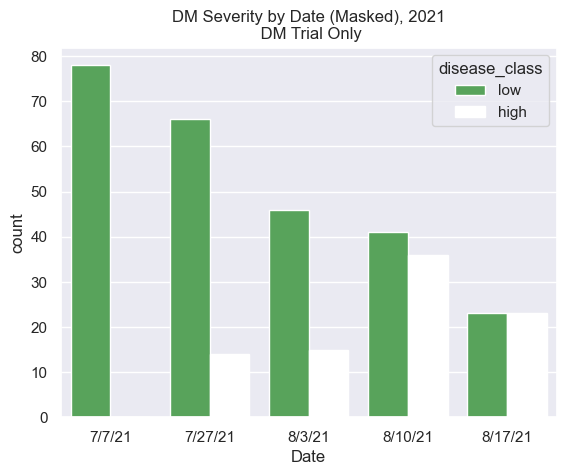

In [187]:
sns.countplot(data=dm_trial_m, x="Date", hue="disease_class")
plt.title('DM Severity by Date (Masked), 2021\n DM Trial Only')

#plt.savefig(home+'figs/sevbydate_dmtrial.png')

Text(0.5, 1.0, 'DM Severity by Date, 2021 (Masked)\n All Rows')

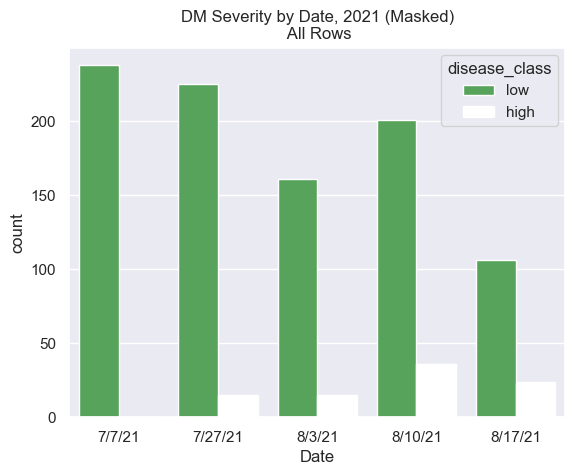

In [188]:
sns.countplot(data=df_2021_m, x="Date", hue="disease_class")
plt.title('DM Severity by Date, 2021 (Masked)\n All Rows')

#plt.savefig(home+'figs/sevbydate_dmtrial.png')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

8/3/21_low v.s. 8/3/21_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.814e-01 U_stat=4.650e+02
7/27/21_low v.s. 7/27/21_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.440e+02
8/10/21_low v.s. 8/10/21_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.061e-05 U_stat=1.185e+03
8/17/21_low v.s. 8/17/21_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.950e+02


Text(0.5, 1.0, 'ARVI 2021, DM Trial, Masked')

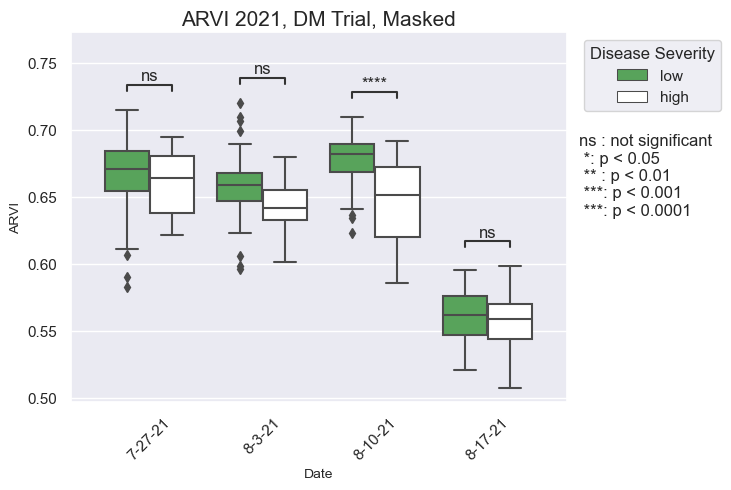

In [189]:
x = "Date"
y = "arvi"
hue = "disease_class"
hue_order=['low', 'high']
order = dm_trial_m['Date'].unique()[1:]
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=dm_trial_m, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['7-27-21','8-3-21','8-10-21','8-17-21'], 
                   rotation=45)
add_stat_annotation(ax, data=dm_trial_m, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=10)
plt.ylabel("ARVI", fontsize= 10)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n *: p < 0.05\n ** : p < 0.01\n ***: p < 0.001\n ***: p < 0.0001', fontsize=12)
plt.title("ARVI 2021, DM Trial, Masked", fontsize=15)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

8/3/21_low v.s. 8/3/21_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.255e-01 U_stat=4.740e+02
7/27/21_low v.s. 7/27/21_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.790e-01 U_stat=6.210e+02
8/10/21_low v.s. 8/10/21_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.329e-04 U_stat=1.145e+03
8/17/21_low v.s. 8/17/21_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.160e-01 U_stat=3.390e+02


Text(0.5, 1.0, 'EVI 2021, DM Trial, Masked')

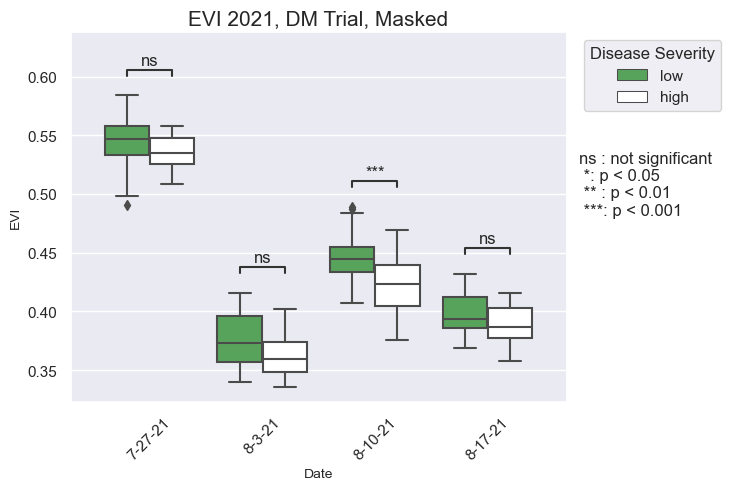

In [190]:
x = "Date"
y = "evi"
hue = "disease_class"
hue_order=['low', 'high']
order = dm_trial_m['Date'].unique()[1:]
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=dm_trial_m, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['7-27-21','8-3-21','8-10-21','8-17-21'], 
                   rotation=45)
add_stat_annotation(ax, data=dm_trial_m, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=10)
plt.ylabel("EVI", fontsize= 10)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n *: p < 0.05\n ** : p < 0.01\n ***: p < 0.001', fontsize=12)
plt.title("EVI 2021, DM Trial, Masked", fontsize=15)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

8/3/21_low v.s. 8/3/21_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.422e-01 U_stat=4.710e+02
7/27/21_low v.s. 7/27/21_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.234e-01 U_stat=6.330e+02
8/10/21_low v.s. 8/10/21_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.254e-04 U_stat=1.133e+03
8/17/21_low v.s. 8/17/21_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.498e-01 U_stat=3.250e+02


Text(0.5, 1.0, 'SAVI 2021, DM Trial, Masked')

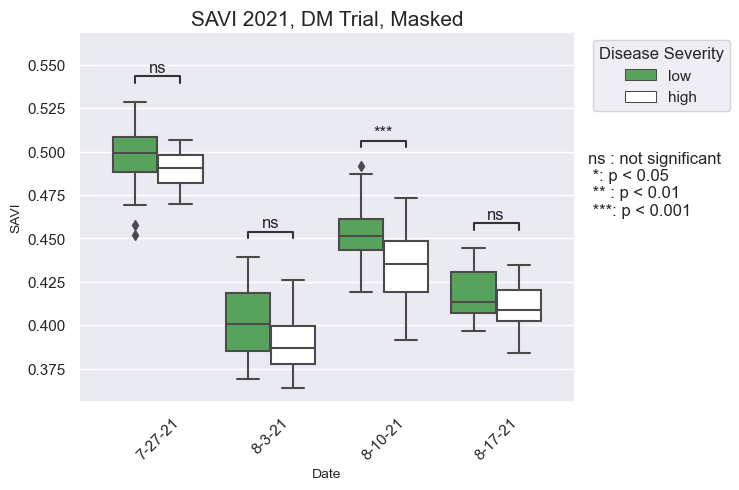

In [191]:
x = "Date"
y = "savi"
hue = "disease_class"
hue_order=['low', 'high']
order = dm_trial_m['Date'].unique()[1:]
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=dm_trial_m, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['7-27-21','8-3-21','8-10-21','8-17-21'], 
                   rotation=45)
add_stat_annotation(ax, data=dm_trial_m, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=10)
plt.ylabel("SAVI", fontsize= 10)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n *: p < 0.05\n ** : p < 0.01\n ***: p < 0.001', fontsize=12)
plt.title("SAVI 2021, DM Trial, Masked", fontsize=15)


In [192]:
from scipy import stats
def mann_whitney_u_test(distribution_1, distribution_2):
    """
    Perform the Mann-Whitney U Test, comparing two different distributions.
    Args:
       distribution_1: List. 
       distribution_2: List.
    Outputs:
        u_statistic: Float. U statisitic for the test.
        p_value: Float.
    """
    u_statistic, p_value = stats.mannwhitneyu(distribution_1, distribution_2)
    return print("Mann-Whitney U:", u_statistic, "p-value:", p_value)


#### MAIN FUNCTION ####
#Perform the Mann-Whitney U Test on the two distributions

high_2021 = df_2021_m[df_2021_m['disease_class']=='high']
low_2021 = df_2021_m[df_2021_m['disease_class']=='low']

In [193]:
mann_whitney_u_test(high_2021['arvi'], low_2021['arvi'])

Mann-Whitney U: 23165.0 p-value: 2.3620340772517534e-12


In [194]:
mann_whitney_u_test(high_2021['savi'], low_2021['savi'])

Mann-Whitney U: 30435.0 p-value: 1.7885235528032684e-05


In [195]:
mann_whitney_u_test(high_2021['evi'], low_2021['evi'])

Mann-Whitney U: 29620.0 p-value: 4.330265796780659e-06


In [196]:
mann_whitney_u_test(high_2021['ndvi'], low_2021['ndvi'])

Mann-Whitney U: 33152.0 p-value: 0.0010652966802792217


In [19]:
high_2021.iloc[:, 2:6]

,blue,green,red,nir
255,0.039979,0.076186,0.058634,0.357662
262,0.041257,0.076057,0.054167,0.355180
263,0.041457,0.077332,0.058714,0.357157
271,0.043690,0.078921,0.062028,0.346786
272,0.041176,0.079490,0.061128,0.347045
...,...,...,...,...
957,0.010179,0.066221,0.043604,0.258096
960,0.014800,0.065496,0.046896,0.265800
964,0.009743,0.065223,0.044500,0.261313
965,0.013334,0.064976,0.045017,0.265424


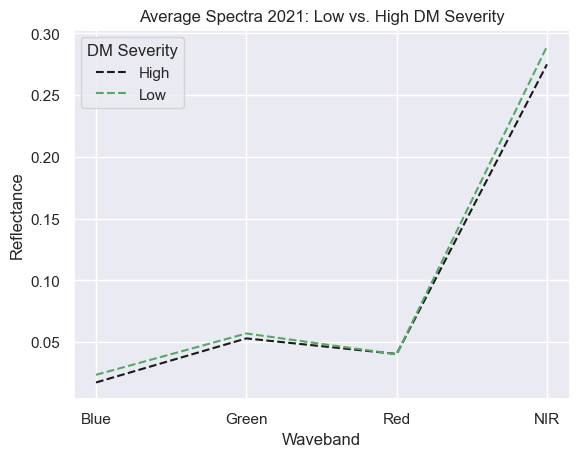

In [197]:
plt.plot(high_2021.iloc[:, 2:6].mean(), '--k', label='High')
plt.plot(low_2021.iloc[:, 2:6].mean(), '--g', label='Low')

plt.xlabel('Waveband')
plt.ylabel('Reflectance')
plt.xticks(np.arange(4), ['Blue', 'Green', 'Red', 'NIR'])
plt.legend(title='DM Severity')
plt.title('Average Spectra 2021: Low vs. High DM Severity')
plt.show()

In [198]:
# Importing library
from scipy.stats import f_oneway

f_oneway(high_2021['arvi'], low_2021['arvi'])

F_onewayResult(statistic=49.1683116460131, pvalue=4.272086547908466e-12)

In [199]:
f_oneway(high_2021['evi'], low_2021['evi'])

F_onewayResult(statistic=25.56153131095194, pvalue=5.078354163740447e-07)

In [200]:
f_oneway(high_2021['savi'], low_2021['savi'])

F_onewayResult(statistic=18.777575141409805, pvalue=1.6142817933241847e-05)

In [201]:
f_oneway(high_2021['ndvi'], low_2021['ndvi'])

F_onewayResult(statistic=11.566556632542083, pvalue=0.0006975486533563386)

In [202]:
high_2021.shape

(90, 24)

In [203]:
low_2021.shape

(931, 24)

In [109]:
dm_high = high_2021[high_2021['row']<=5]
dm_low = low_2021[low_2021['row']<=5]

mann_whitney_u_test(dm_high['arvi'], dm_low['arvi'])

Mann-Whitney U: 5010.0 p-value: 1.2237608908281624e-14


In [110]:
mann_whitney_u_test(dm_high['evi'], dm_low['evi'])

Mann-Whitney U: 6624.0 p-value: 1.2388317730104401e-08


In [111]:
mann_whitney_u_test(dm_high['savi'], dm_low['savi'])

Mann-Whitney U: 6943.0 p-value: 1.1888647985822789e-07


In [204]:
# Remind ourselves of size of different datasets

df_2021.shape, df_2021_m.shape

((1195, 24), (1021, 24))

In [205]:
skysat_m.shape, skysat_nm.shape

((1525, 23), (2214, 24))

In [206]:
# Let's try a model
import sklearn

# Try with unmasked data first
feature_names = ['blue', 'green', 'red', 'nir', 'ndvi', 'evi', 'arvi', 'savi']
X = df_2021[feature_names]
y = df_2021['disease_class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [207]:
print('Training feature size:',X_train.shape[0])
print('Test feature size:',X_test.shape[0])


Training feature size: 896
Test feature size: 299


In [208]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.90
Accuracy of Logistic regression classifier on test set: 0.88


In [209]:
predictions = logreg.predict(X_test)
score = logreg.score(X_test, y_test)
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[  0  35]
 [  0 264]]


In [210]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.80


In [211]:
predictions_clf = clf.predict(X_test)
score_clf = clf.score(X_test, y_test)
from sklearn import metrics
cm_clf = metrics.confusion_matrix(y_test, predictions_clf)
print(cm_clf)

[[  4  31]
 [ 30 234]]


In [212]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.91
Accuracy of K-NN classifier on test set: 0.88


In [213]:
predictions_knn = knn.predict(X_test)
score_knn = knn.score(X_test, y_test)
from sklearn import metrics
cm_knn = metrics.confusion_matrix(y_test, predictions_knn)
print(cm_knn)

[[  3  32]
 [  5 259]]


In [214]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.90
Accuracy of LDA classifier on test set: 0.88


In [215]:
predictions_lda = lda.predict(X_test)
score_lda = lda.score(X_test, y_test)
from sklearn import metrics
cm_lda = metrics.confusion_matrix(y_test, predictions_lda)
print(cm_lda)

[[  0  35]
 [  1 263]]


In [216]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.78
Accuracy of GNB classifier on test set: 0.78


In [217]:
predictions_gnb = gnb.predict(X_test)
score_gnb = gnb.score(X_test, y_test)
from sklearn import metrics
cm_gnb = metrics.confusion_matrix(y_test, predictions_gnb)
print(cm_gnb)

[[  9  26]
 [ 40 224]]


In [218]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.90
Accuracy of SVM classifier on test set: 0.88


In [219]:
predictions_svm = svm.predict(X_test)
score_svm = svm.score(X_test, y_test)
from sklearn import metrics
cm_svm = metrics.confusion_matrix(y_test, predictions_svm)
print(cm_svm)

[[  0  35]
 [  0 264]]


In [220]:
## Rerun with masked data
X = df_2021_m[feature_names]
y = df_2021_m['disease_class']

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [221]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.92
Accuracy of SVM classifier on test set: 0.90


In [222]:
predictions_svm = svm.predict(X_test)
score_svm = svm.score(X_test, y_test)
from sklearn import metrics
cm_svm = metrics.confusion_matrix(y_test, predictions_svm)
print(cm_svm)

[[  0  25]
 [  0 231]]


In [223]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.81
Accuracy of GNB classifier on test set: 0.78


In [224]:
predictions_gnb = gnb.predict(X_test)
score_gnb = gnb.score(X_test, y_test)

cm_gnb = metrics.confusion_matrix(y_test, predictions_gnb)
print(cm_gnb)

[[  6  19]
 [ 38 193]]


In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.90
Accuracy of LDA classifier on test set: 0.91


In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 0.91


In [53]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.87


In [54]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.90
Accuracy of Logistic regression classifier on test set: 0.91


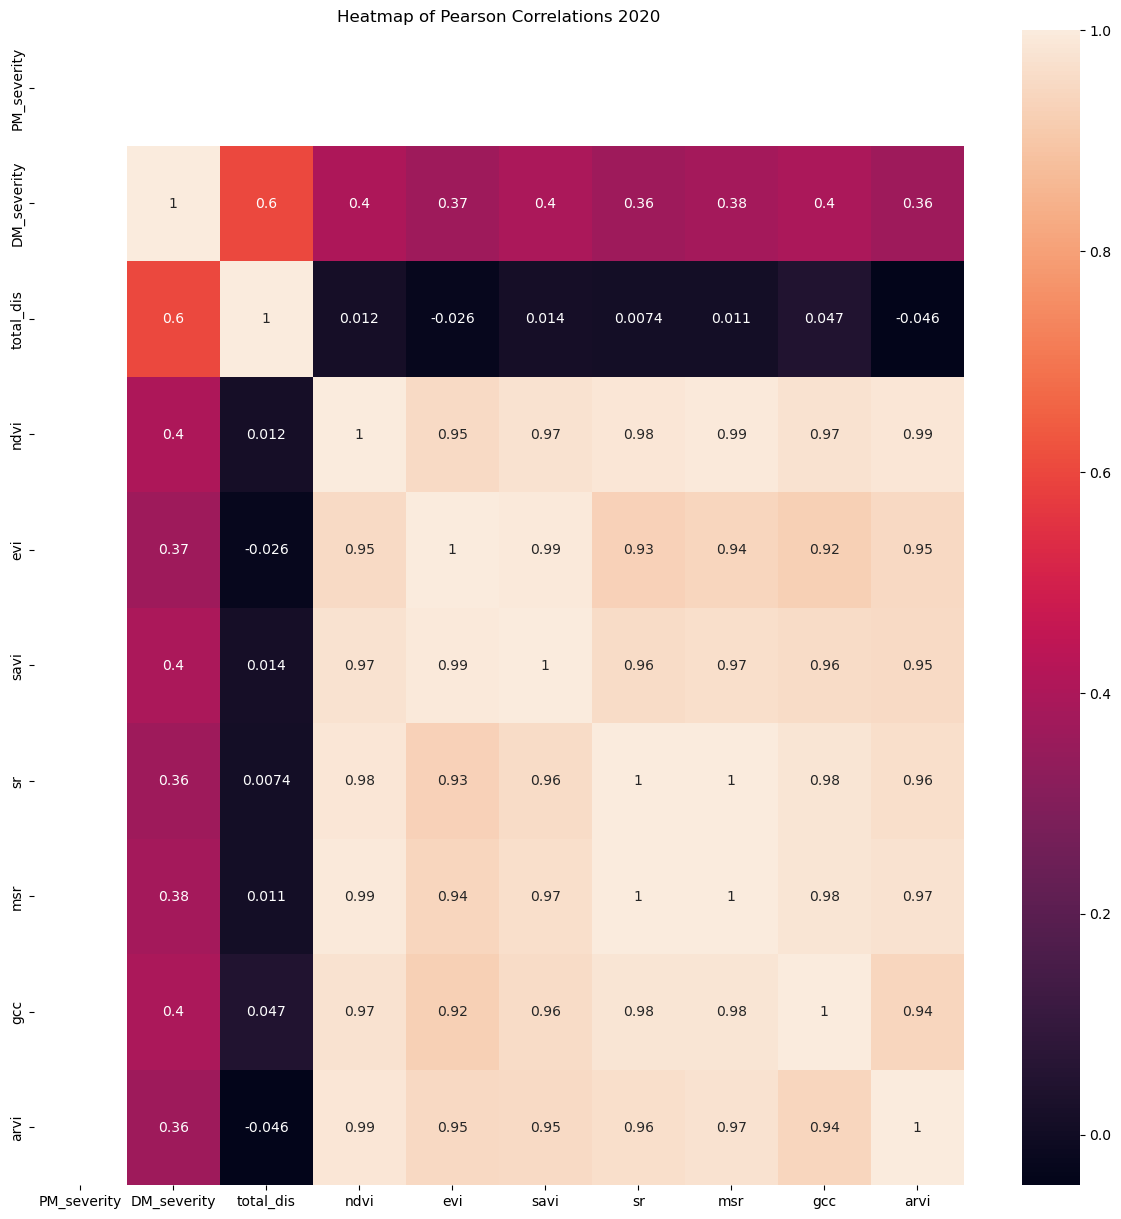

In [55]:
# Open 2020 dataset

ss_2020_dates = ss_2020.Date.unique()
df_2020 = skysat_m[skysat_m['Date'].isin(ss_2020_dates)]
filtered_2020 = df_2020[cols]
correlations_2020 = filtered_2020.corr()

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlations_2020, annot=True).set(title='Heatmap of Pearson Correlations 2020');
plt.show()

In [56]:
df_2020['disease_class'] = 'low'
df_2020.loc[df_2020['DM_severity'] > 10, 'disease_class'] = 'high'

/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_5733/1968273549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['disease_class'] = 'low'


In [57]:
X_2020 = df_2020[feature_names]
y_2020 = df_2020['disease_class']

# Test log. reg. model trained on 2021 data with 2020 data 
logreg.score(X_2020, y_2020)


/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.9250936329588015

In [58]:
#decision tree classifier
clf.score(X_2020, y_2020)

/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.9176029962546817

In [59]:
knn.score(X_2020, y_2020)

/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.9250936329588015

In [60]:
lda.score(X_2020, y_2020)

/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(


0.0749063670411985

In [61]:
gnb.score(X_2020, y_2020)

/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


0.9250936329588015

In [62]:
svm.score(X_2020, y_2020)

/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.9250936329588015